   support         itemsets
0      0.8          (bread)
1      0.8         (butter)
2      0.6           (milk)
3      0.6  (butter, bread)


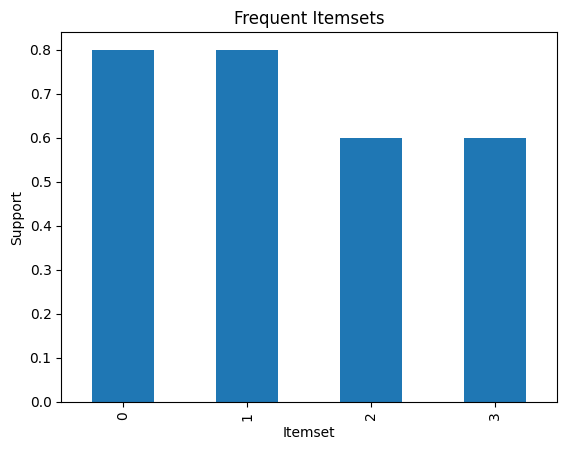

In [ ]:
#Mining Frequent Itemsets (Apriori Algorithm)
import pandas as pd
dataset = pd.read_csv('retail_dataset.csv')
dataset = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'butter'],
    ['bread', 'butter']
]
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print(frequent_itemsets)
import matplotlib.pyplot as plt

frequent_itemsets['support'].plot(kind='bar')
plt.title('Frequent Itemsets')
plt.xlabel('Itemset')
plt.ylabel('Support')
plt.show()


   support         itemsets
0      0.8          (bread)
1      0.8         (butter)
2      0.6           (milk)
3      0.6  (butter, bread)
4      0.4    (milk, bread)
5      0.4   (milk, butter)
  antecedents consequents  antecedent support  consequent support  support  \
0    (butter)     (bread)                 0.8                 0.8      0.6   
1     (bread)    (butter)                 0.8                 0.8      0.6   
2      (milk)     (bread)                 0.6                 0.8      0.4   
3     (bread)      (milk)                 0.8                 0.6      0.4   
4      (milk)    (butter)                 0.6                 0.8      0.4   
5    (butter)      (milk)                 0.8                 0.6      0.4   

   confidence      lift  representativity  leverage  conviction  \
0    0.750000  0.937500               1.0     -0.04         0.8   
1    0.750000  0.937500               1.0     -0.04         0.8   
2    0.666667  0.833333               1.0     -0.08     

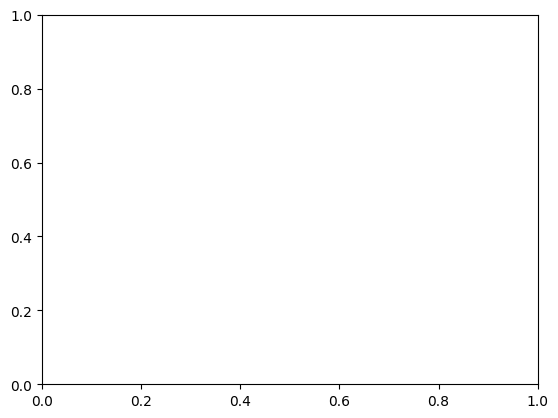

In [20]:
import seaborn as sns
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
# Frequent items found
frequent_itemsets=apriori(df,min_support=0.3,use_colnames=True)
print(frequent_itemsets)

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.5)
print(rules)

# Filter rules where the confidence is above 0.8
strong_rules = rules[rules['confidence'] > 0.8]
print(strong_rules)
sns.scatterplot(data=strong_rules, x='support', y='confidence', size='lift', hue='lift')
plt.show()
#print(df.head())


customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object
               customerID  gender  SeniorCitizen  Partner  Dependents
customerID            NaN     NaN            NaN      NaN         NaN
gender                NaN     NaN            NaN      NaN         NaN
SeniorCitizen         NaN     NaN            NaN      NaN         NaN
Partner               NaN     NaN            NaN      NaN         NaN
Dependents            NaN     NaN            NaN      NaN         NaN


C:\Users\manna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\manna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


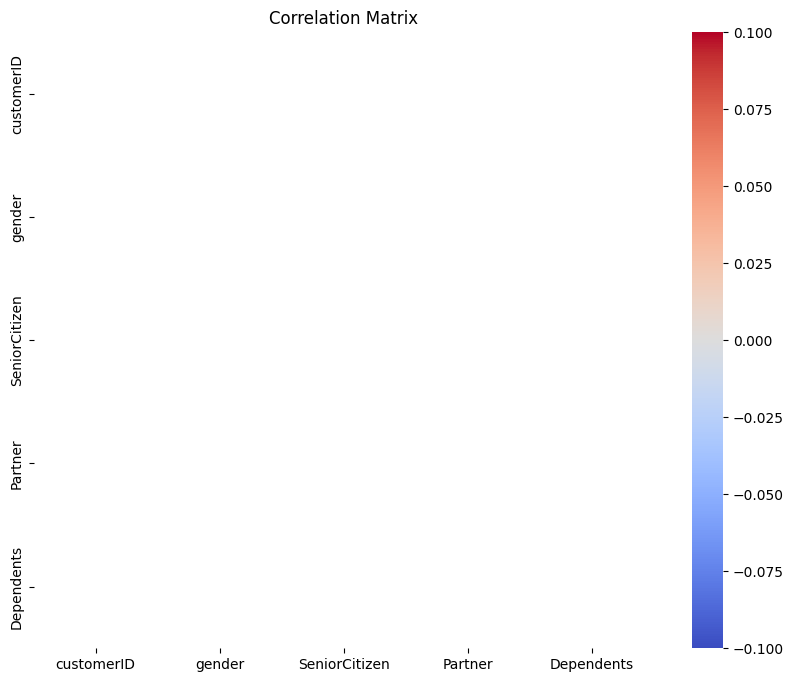

ValueError: could not convert string to float: '7590-VHVEG'

In [ ]:
#. Correlation Analysis 
import numpy as np
import pandas as pd
data = pd.read_csv('customer_data.csv')
print(data.dtypes)

# Convert columns that should be numeric
data['Partner'] = pd.to_numeric(data['Partner'], errors='coerce')

# Drop non-numeric columns
data_numeric = data.select_dtypes(include=[np.number])

correlation_matrix = data.dropna().corr(method='pearson')
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
# Check the data types of the columns
spearman_corr = data.corr(method='spearman')
print(spearman_corr)
________________________________________


